In [ ]:
# Set up Kaggle API for downloading the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:13<00:00, 86.2MB/s]
100% 1.06G/1.06G [00:13<00:00, 82.7MB/s]


In [ ]:
# Extract the downloaded dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Make necessary imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
# Load the training and validation datasets using TensorFlow's image_dataset_from_directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize the pixel values of images
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create a convolutional neural network (CNN) model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.2397 - accuracy: 0.5992 - val_loss: 0.6953 - val_accuracy: 0.6924
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.6009 - accuracy: 0.6903 - val_loss: 0.5273 - val_accuracy: 0.7420
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4894 - accuracy: 0.7671 - val_loss: 0.6037 - val_accuracy: 0.6716
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4228 - accuracy: 0.8036 - val_loss: 0.4516 - val_accuracy: 0.8018
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3696 - accuracy: 0.8359 - val_loss: 0.5750 - val_accuracy: 0.7656
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3211 - accuracy: 0.8627 - val_loss: 0.4596 - val_accuracy: 0.7954
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2459 - accuracy: 0.8962 - val_loss: 0.6155 - val_ac

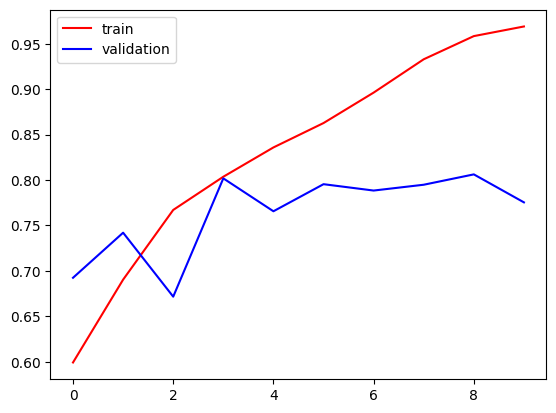

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

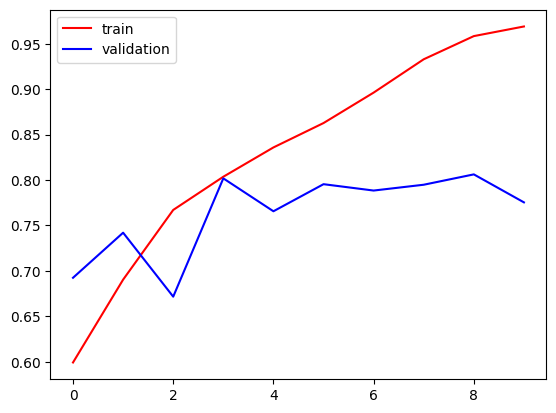

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

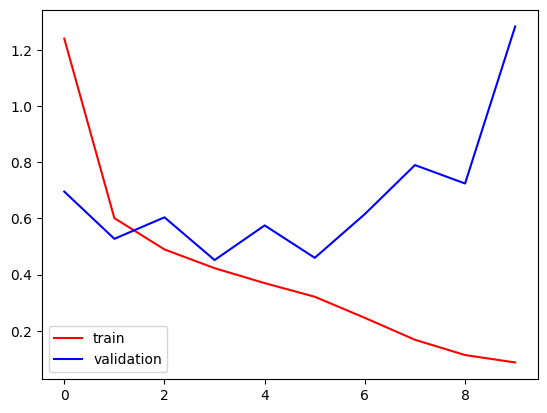

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

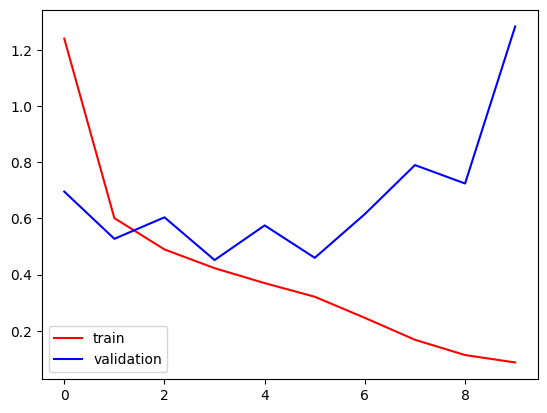

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
# Load a test image of a test_img1
test_img1 = cv2.imread('/content/test_img1.jpg')


In [ ]:
test_img1.shape

(320, 500, 3)

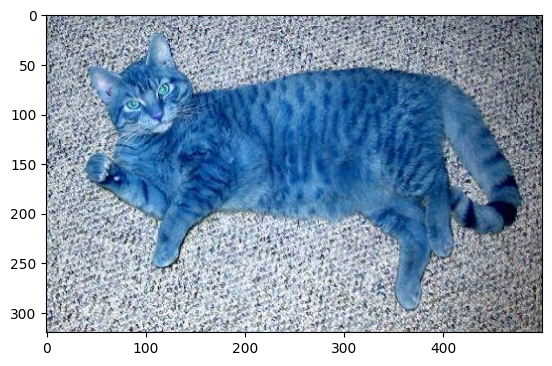

In [ ]:

# Display the test image
plt.imshow(test_img1)

In [ ]:
# Resize and preprocess the test image
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
import numpy as np
test_input1 = test_img1.reshape((1, 256, 256, 3))

In [ ]:
# Predict the class of the test image
prediction = model.predict(test_input1)

# Define a threshold for classification
threshold = 0.5

# Convert the prediction to class label
if prediction <= threshold:
    predicted_class = 'dog'
else:
    predicted_class = 'cat'

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 17ms/step
Predicted class: cat


In [ ]:
test_img2 = cv2.imread('/content/test_img2.jpg')

In [ ]:
test_img2.shape

(273, 233, 3)

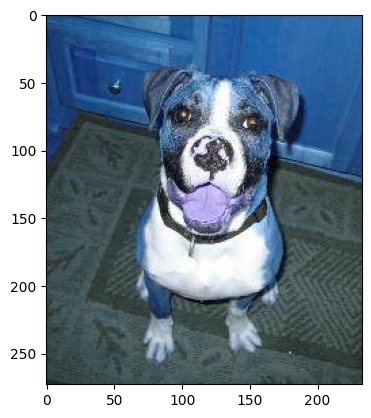

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_input2 = test_img2.reshape((1, 256, 256, 3))

In [ ]:
# Predict the class of the test image
prediction = model.predict(test_input2)

# Define a threshold for classification
threshold = 0.5

# Convert the prediction to class label
if prediction <= threshold:
    predicted_class = 'dog'
else:
    predicted_class = 'cat'

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 20ms/step
Predicted class: dog
